In [1]:
import numpy as np
from matplotlib import pyplot as plt

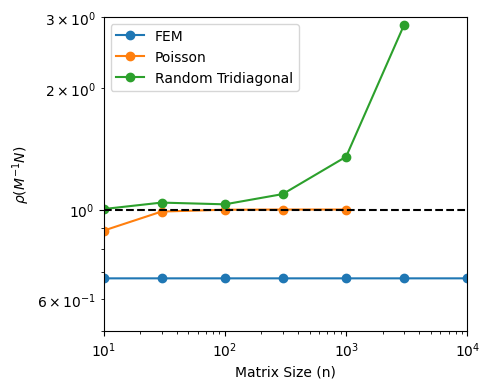

In [33]:
fem_rho = np.genfromtxt("data_new/femRadius.csv", delimiter=",")
pois_rho = np.genfromtxt("data_new/poissonRadius.csv", delimiter=",")
ans_rho = np.genfromtxt("data_new/ans.csv", delimiter=",")

plt.figure(figsize=(5,4))
plt.semilogx(fem_rho[:,0],fem_rho[:,1], "-o", label="FEM")
plt.semilogx(pois_rho[:,0],pois_rho[:,1],"-o", label="Poisson")
plt.loglog(ans_rho[:,0],ans_rho[:,1], "-o",label="Random Tridiagonal")
plt.axhline(y=1, color='k', linestyle='--')
plt.legend()
plt.ylim(0.5, 3)
plt.xlim(1e1, 1e4)
plt.xlabel("Matrix Size (n)")
plt.ylabel(r"$\rho(M^{-1} N)$")
plt.tight_layout()
plt.savefig("Matrix_size_v_rho.png", dpi=300)

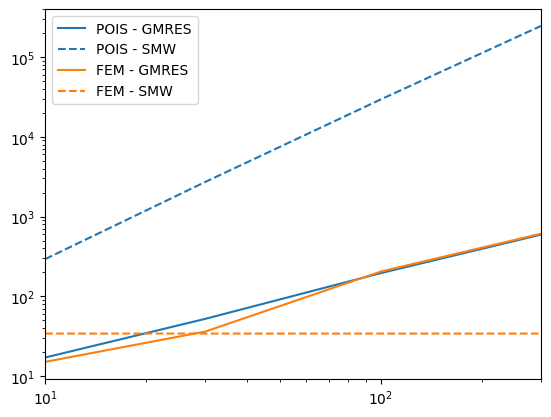

In [50]:
pois_gmres = np.genfromtxt("data_new/pois_gmres.csv", delimiter=",")
pois_smw = np.genfromtxt("data_new/pois_smw.csv", delimiter=",")
fem_gmres = np.genfromtxt("data_new/fem_gmres.csv", delimiter=",")
fem_smw = np.genfromtxt("data_new/fem_smw.csv", delimiter=",")

plt.loglog(pois_gmres[:,0], pois_gmres[:,1], '-',label="POIS - GMRES", color='tab:blue')
plt.loglog(pois_smw[:,0], pois_smw[:,1], '--', label="POIS - SMW", color='tab:blue')

plt.loglog(fem_gmres[:,0], fem_gmres[:,1], '-',label="FEM - GMRES", color='tab:orange')
plt.loglog(fem_smw[:,0], fem_smw[:,1], '--', label="FEM - SMW", color='tab:orange')
plt.xlim(1e1, 3e2)
plt.legend()

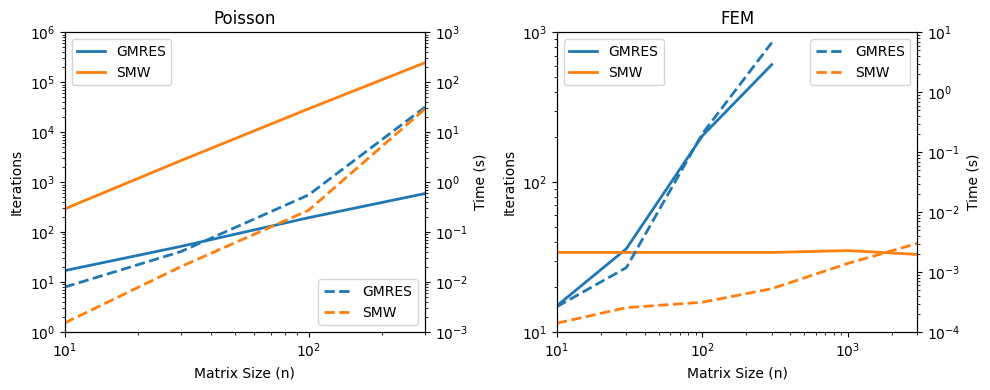

In [101]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,4 ))
ax1.plot(pois_gmres[:,0], pois_gmres[:,1], label="GMRES", linewidth=2)
ax1.plot(pois_smw[:,0], pois_smw[:,1], label="SMW", linewidth=2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1e1, 3e2)
ax1.set_ylim(1e0, 1e6)
ax1.legend()
ax1.set_xlabel("Matrix Size (n)")
ax1.set_ylabel("Iterations")

ax2 = ax1.twinx()
ax2.plot(pois_gmres[:,0], pois_gmres[:,2], '--', color="tab:blue", linewidth=2, label="GMRES")
ax2.plot(pois_smw[:,0], pois_smw[:,2],'--', color="tab:orange", linewidth=2, label="SMW")
ax2.set_yscale("log")
ax2.set_ylabel("Time (s)")
ax2.set_ylim(1e-3, 1e3)
ax2.legend(loc="lower right")
ax2.set_title("Poisson")


ax3.plot(fem_gmres[:,0], fem_gmres[:,1], label="GMRES", linewidth=2)
ax3.plot(fem_smw[:,0], fem_smw[:,1], label="SMW", linewidth=2)
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlim(1e1, 3e3)
ax3.set_ylim(1e1, 1e3)
ax3.legend(loc="upper left")
ax3.set_xlabel("Matrix Size (n)")
ax3.set_ylabel("Iterations")


ax4 = ax3.twinx()
ax4.plot(fem_gmres[:,0], fem_gmres[:,2], '--', color="tab:blue", linewidth=2, label="GMRES")
ax4.plot(fem_smw[:,0], fem_smw[:,2],'--', color="tab:orange", linewidth=2, label="SMW")
ax4.set_yscale("log")
ax4.set_ylabel("Time (s)")
ax4.set_ylim(1e-4, 1e1)
ax4.legend(loc="upper right")
ax4.set_title("FEM")

plt.tight_layout()

plt.savefig("convergence_timing.png", dpi=300)
